  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.008e-02 ...  1.996e+01  2.000e+01]
        y: [[ 1.047e+00  1.046e+00 ...  7.621e-01  8.214e-01]
            [ 2.094e+00  2.092e+00 ...  1.837e-01  2.353e-01]
            [ 0.000e+00 -6.792e-02 ...  1.569e+00  1.386e+00]
            [ 0.000e+00 -1.023e-01 ...  1.104e+00  1.464e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000019492DA86D0>
 t_events: None
 y_events: None
     nfev: 974
     njev: 0
      nlu: 0


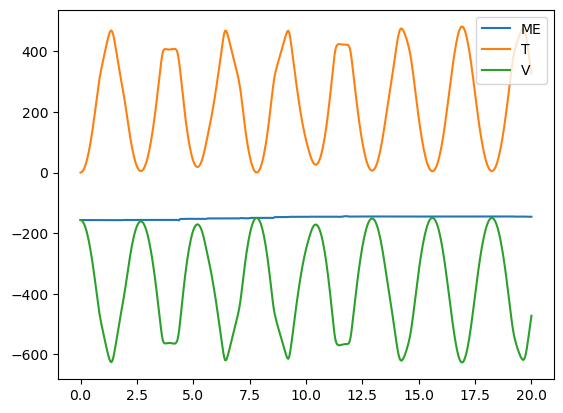

The theoretical and expected value of mechanical energy is -156.8000000000001
The average calculated mechanical energy is  -149.105709122475
the Root Mean Square Error of mechanical energy is 8.99306593394937
the standard deviation of mechanical energy is  0.013152562107351965


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import stats as st
import math
from astropy import constants as const
import pandas as pd
import scipy.linalg as lin


# Constants
l1 = 4
l2 = 2
m1 = 4
m2 = 8
g = 9.8


# Initial value of theta1, theta2, dtheta1, dtheta2 respectively
x0 = np.array([math.pi/3, math.pi*2/3, 0, 0])

#Calculate theoretical mechanic energy
theta1, theta2, dtheta1, dtheta2 = x0
ME_theo = 1/2*m1*l1**2*dtheta1**2 + 1/2*m2*l1**2*dtheta1**2 + 1/2*m2*l2**2*dtheta2**2 + m2*l1*l2*dtheta1*dtheta2*math.cos(theta1-theta2) -m1*g*l1*math.cos(theta1) - m2*g*(l1*math.cos(theta1)+l2*math.cos(theta2))


# Control function, the deduction is from another pdf.
def func(t, status):
    theta1, theta2, dtheta1, dtheta2 = status
    
    # Multiplier matrix
    Coef=[[(m1+m2)*l1,m2*l2*np.cos(theta1-theta2)],[l1*np.cos(theta1-theta2),l2]]
    
    # Result matrix
    Prod=[-m2*l2*dtheta2**2*np.sin(theta1-theta2)-(m1+m2)*g*np.sin(theta1), l1*dtheta1**2*np.sin(theta1-theta2)-g*np.sin(theta2)]
    
    # Solve for second derivative
    ddtheta1,ddtheta2=lin.solve(Coef,Prod)
    
    return dtheta1,dtheta2,ddtheta1,ddtheta2

# The problem is calculation. I solved the Euler-Lagrange Equations multiple times but all wrong. Luckily I got once correct.    
#Define the range of values to solve over
#Initial time
ti = 0 
#Final time
tf = 20 
# Duration
t_span = np.array([ti,tf])


#Define the range of values to be kept and output
NVals = 25*(tf-ti) #Number of values to sample when printing out at the end
tVals = np.linspace(ti,tf,NVals) 

# Use integrate.solve_ivp to solve the equation
result = integrate.solve_ivp(func,t_span,x0,method='RK45',t_eval=tVals, dense_output=True)
result_y = result.y
print(result)


# generate energy figure
ME = np.zeros(NVals)
V = np.zeros(NVals)
T = np.zeros(NVals)

# Generate images to make video
for i in range (len(result_y[0])):
    plt.axis([-12, 12, -12, 12])

    theta1 = result_y[0][i]
    theta2 = result_y[1][i]
    dtheta1 = result_y[2][i]
    dtheta2 = result_y[3][i]
    
    x1 = l1*math.sin(theta1)
    y1 = -l1*math.cos(theta1)
    x2 = x1+l2*math.sin(theta2)
    y2 = y1-l2*math.cos(theta2)
    
    # Calculate mechanic energy
    T[i] = 1/2*m1*l1**2*dtheta1**2 + 1/2*m2*l1**2*dtheta1**2 + 1/2*m2*l2**2*dtheta2**2 + m2*l1*l2*dtheta1*dtheta2*math.cos(theta1-theta2)
    V[i] = -m1*g*l1*math.cos(theta1) - m2*g*(l1*math.cos(theta1)+l2*math.cos(theta2))
    ME[i] = T[i] + V[i]
    
    
    plt.plot([0, x1], [0, y1], c="y")
    plt.plot([x1, x2], [y1, y2], c="k")
    plt.scatter(x1, y1, c="b")
    plt.scatter(x2, y2, c='r')
    
    plt.savefig("graph"+str(i)+".png", dpi=200)
    plt.cla()

# plt.show()
# plt.savefig("trace.png", dpi=200)

#Draw energy curves
plt.plot(tVals, ME)
plt.plot(tVals, T)
plt.plot(tVals, V)
plt.legend(['ME', 'T', 'V'])
plt.show()


print("The theoretical and expected value of mechanical energy is", ME_theo)
print("The average calculated mechanical energy is ", np.mean(ME))
print("the Root Mean Square Error of mechanical energy is", np.sqrt(np.mean((ME-ME_theo)**2))) # Describes accuracy
print("the standard deviation of mechanical energy is ", np.std(abs((ME-np.mean(ME))/np.mean(ME)))) # Describes preciseness



# Used help from this link https://zhuanlan.zhihu.com/p/133855329

In [80]:
# from sympy import *
# from sympy import Derivative as D

# var("x1 x2 y1 y2 l1 l2 m1 m2 th1 th2 dth1 dth2 ddth1 ddth2 t g tmp")

# sublist = [
# (D(th1(t), t, t), ddth1),
# (D(th1(t), t), dth1),
# (D(th2(t), t, t), ddth2),
# (D(th2(t),t), dth2),
# (th1(t), th1),
# (th2(t), th2)    
# ]

# x1 = l1*sin(th1(t))
# y1 = -l1*cos(th1(t))
# x2 = l1*sin(th1(t)) + l2*sin(th2(t))
# y2 = -l1*cos(th1(t)) - l2*cos(th2(t))

# vx1 = diff(x1, t)
# vx2 = diff(x2, t)
# vy1 = diff(y1, t)
# vy2 = diff(y2, t)

# # 拉格朗日量
# L = m1/2*(vx1**2 + vy1**2) + m2/2*(vx2**2 + vy2**2) - m1*g*y1 - m2*g*y2

# # 拉格朗日方程
# def lagrange_equation(L, v):    
#     a = L.subs(D(v(t), t), tmp).diff(tmp).subs(tmp, D(v(t), t))
#     b = L.subs(D(v(t), t), tmp).subs(v(t), v).diff(v).subs(v, v(t)).subs(tmp, D(v(t), t))
#     c = a.diff(t) - b
#     c = c.subs(sublist)  
#     c = trigsimp(simplify(c))
#     c = collect(c, [th1,th2,dth1,dth2,ddth1,ddth2])
#     return c

# eq1 = lagrange_equation(L, th1)
# eq2 = lagrange_equation(L, th2)

In [81]:
import collections
from collections import Counter
print(collections.__all__)
L = ['red', 'blue', 'red', 'green', 'blue', 'blue'] 
Counter(L)

['ChainMap', 'Counter', 'OrderedDict', 'UserDict', 'UserList', 'UserString', 'defaultdict', 'deque', 'namedtuple']


Counter({'blue': 3, 'red': 2, 'green': 1})

In [4]:
import numpy as np
a = np.array([[1, -1, 1], [0, 2, -1], [2, 3, 0]])
print(np.linalg.inv(a))

[[ 3.  3. -1.]
 [-2. -2.  1.]
 [-4. -5.  2.]]
